## Investment Thesis – NVIDIA (NVDA)

### Core Thesis

* NVIDIA is currently priced as if peak-cycle AI infrastructure economics persist indefinitely. Under a capital-constrained fade-to-steady valuation framework, intrinsic value is estimated at `$26–$65` per share (Base: `~$42`)**, materially below the current market price (~$189).

* Scenario analysis demonstrates that even under optimistic long-run assumptions (Bull Case: ~$65), intrinsic value remains significantly below the market valuation, indicating that current pricing capitalizes extraordinarily optimistic steady-state economics.

* Reverse-engineering the market price implies a **permanent free-cash-flow margin near 60%**, a level requiring unprecedented pricing power, minimal reinvestment needs, and structurally extraordinary profitability on a perpetual basis—conditions not historically sustained by mature mega-cap companies.

* Relative valuation using peer medians (AMD, MU) implies a market-anchored valuation range of approximately `$71–$166`, further confirming that NVIDIA trades above both intrinsic and peer-anchored benchmarks.

* Sensitivity analysis confirms that valuation is most sensitive to long-run profitability and discounting assumptions, reinforcing that terminal economics dominate the valuation and that current market pricing embeds highly optimistic long-term outcomes.

* The valuation gap does not reflect near-term execution risk, but rather the capitalization of elevated AI-cycle economics far into the future, creating asymmetric downside should growth normalize faster than currently implied.

---

### Key Risks & Catalysts

**Risks**

* Faster-than-expected normalization of hyperscaler AI capital spending
* Increased competitive pressure from AMD, custom silicon, or alternative accelerators
* Rising capital intensity as NVIDIA vertically integrates and invests in networking, software, and platforms

**Catalysts**

* Sustained AI infrastructure spending beyond current expectations
* Continued platform expansion into software and networking with high incremental margins
* Material acceleration in enterprise AI adoption and monetization

---

### What Must Be True for $189 to Be Fair

For the current market price to be internally consistent under a capital-constrained valuation framework, NVIDIA must sustain **near-60% free-cash-flow margins in perpetuity**, implying permanent, historically unprecedented pricing power and capital-light economics. Any reversion toward mature-industry margins would result in substantial valuation compression.

---


**Why use DCF?**

Free Cash Flow is king: stocks and business valuation emphasizes

**Steps of the DCF Model**

1) Estimate Future Cash Flows: First we predict howmuch cash the company will generate in the future, usually for the next 5-10 years
2) Determine a Discount Rate: Then we choose a 'discount rate'. This is like an interest rate that reperesents the risk of investing in the company and the time value of money
3) Calculate Present Value: We use the discount rate to calculate what those future cash flows are worth today
4) Terminal value: We also estiamte a terminal value - what will the company be worth after our specific forecast period
5) Sum it up: We add up all these PV's to get the estimate value of the company
6) Per Share Value: Finally, we divide this by the number of shares to get a per-share value

In [4]:
pip install yahooquery yfinance pandas numpy scipy matplotlib seaborn jinja2 pyyaml tabulate


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from matplotlib.ticker import FuncFormatter
import datetime
import time
import numpy as np
from yahooquery import Ticker 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_rows', None)

In [6]:
symbol = 'NVDA'
stock = Ticker(symbol)

**Get Historic FCF**

+ Create a simple forecast of future FCF based on previous FCF growth ratio

(For model simplicity. FCF projections can be enhanced by considering the individual components of FCF, macroeconomic factors, and sector growth prospects, etc.)

In [8]:
df_cash = pd.DataFrame(stock.cash_flow()) #Pull Cash Flow statement
df_cash['asOfDate'] = pd.to_datetime(df_cash['asOfDate'])
df_cash.set_index('asOfDate',inplace=True)
cash_period = df_cash['periodType'].iloc[0]
df_cash = df_cash.iloc[:, 2:]
df_cash['FreeCashFlow']

df_is = pd.DataFrame(stock.income_statement()) #pulling IS for future use

### Get Historic Net Debt

In [10]:
df_balance = pd.DataFrame(stock.balance_sheet())
df_balance['asOfDate'] = pd.to_datetime(df_balance['asOfDate'])
df_balance.set_index('asOfDate',inplace=True)
df_balance = df_balance.iloc[:, 2:]
df_balance

,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,AvailableForSaleSecurities,BuildingsAndImprovements,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,...,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TotalTaxPayable,TradeandOtherPayablesNonCurrent,TreasurySharesNumber,TreasuryStock,WorkInProcess,WorkingCapital
asOfDate,,,,,,,,,,,,,,,,,,,,,
2021-01-31,NaN,NaN,NaN,NaN,-21000000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.380000e+10,1.075600e+10,NaN,NaN
2022-01-31,1.783000e+09,4.650000e+09,-1.903000e+09,1.038500e+10,NaN,NaN,8.740000e+08,8.850000e+08,3000000.0,1.990000e+09,...,2.661200e+10,1.757500e+10,1.535800e+10,1.324000e+10,132000000.0,1.057000e+09,NaN,0.000000e+00,6.920000e+08,2.449400e+10
2023-01-31,1.193000e+09,3.827000e+09,-2.694000e+09,1.197100e+10,NaN,NaN,1.598000e+09,1.078000e+09,2000000.0,3.389000e+09,...,2.210100e+10,1.908100e+10,1.810900e+10,1.251800e+10,467000000.0,1.385000e+09,NaN,NaN,4.660000e+08,1.651000e+10
2024-01-31,2.699000e+09,9.999000e+09,-3.509000e+09,1.310900e+10,NaN,1.321000e+09,1.816000e+09,1.347000e+09,25000000.0,7.280000e+09,...,4.297800e+10,2.275000e+10,2.138300e+10,1.211900e+10,296000000.0,1.441000e+09,NaN,NaN,1.505000e+09,3.371400e+10
2025-01-31,6.310000e+09,2.306500e+10,-4.401000e+09,1.123700e+10,NaN,3.387000e+09,2.076000e+09,1.807000e+09,24000000.0,8.589000e+09,...,7.932700e+10,3.227400e+10,3.147500e+10,1.422700e+10,881000000.0,2.304000e+09,NaN,NaN,3.399000e+09,6.207900e+10


In [11]:
debt = pd.to_numeric(df_balance['TotalDebt'], errors='coerce').dropna().iloc[-1]
cash = pd.to_numeric(df_balance['CashAndCashEquivalents'], errors='coerce').dropna().iloc[-1]
net_debt = debt - cash
net_debt


1681000000.0

 ### Create a Convert to List Function for Future Wrangling

In [13]:
def column_to_list(df,column_name):
    data_list = df[column_name].tolist()
    data_list = [x for x in data_list if pd.notnull(x)]
    return data_list

In [14]:
historic_fcf = column_to_list(df_cash, 'FreeCashFlow')
historic_fcf

[8132000000.0, 3808000000.0, 27021000000.0, 60853000000.0, 77324000000.0]

### Calculate Average Growth Rate of FCF for Simple Forecasting

In [16]:
fcf_avg_growth_rate = np.mean([(historic_fcf[i]-historic_fcf[i-1]) / historic_fcf[i-1] for i in range(1, len(historic_fcf))])
fcf_avg_growth_rate

1.7717140496078914

### Future projections (next 5 year)

*This is a simple forecast that uses average growth rate

In [18]:
future_year = 5 

In [19]:
future_fcf = [historic_fcf[-1]*(1+fcf_avg_growth_rate)**(i+1) for i in range(future_year)]
future_fcf

[214320017171.88058,
 594033802707.506,
 1646491836906.3965,
 4563604556918.164,
 12649006867264.672]

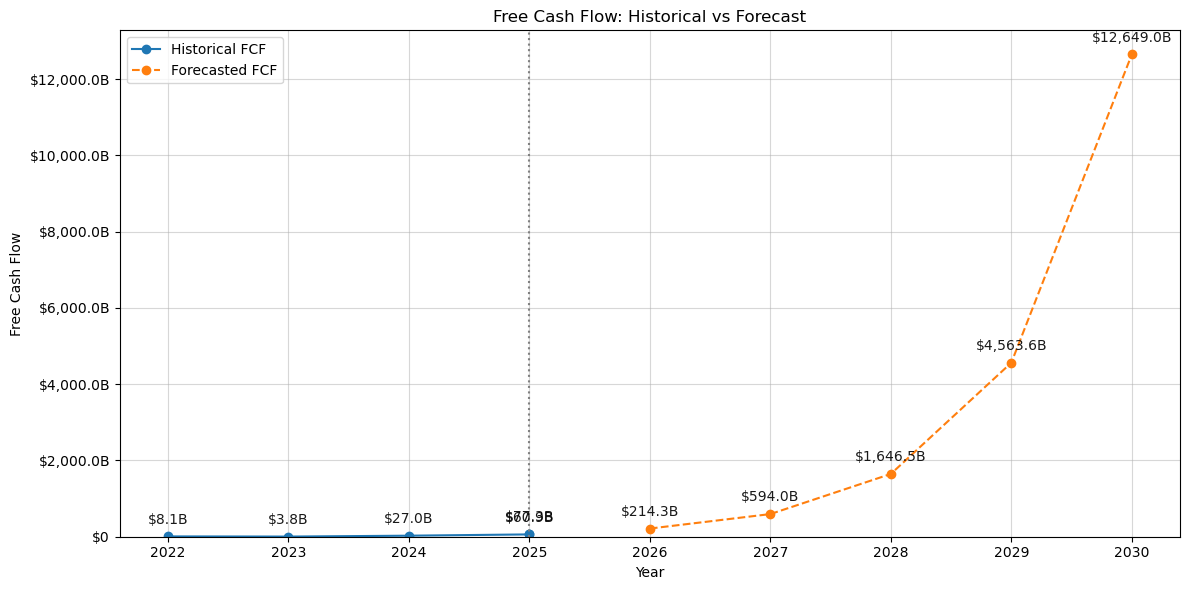

In [20]:

# --- Build a clean historical FCF series (same source for x and y) ---
hist_fcf_series = pd.to_numeric(df_cash["FreeCashFlow"], errors="coerce").dropna().sort_index()

historical_years = hist_fcf_series.index.year.tolist()
historic_fcf = hist_fcf_series.values

# Forecast years based on last historical year
forecast_years = list(range(historical_years[-1] + 1,
                            historical_years[-1] + 1 + len(future_fcf)))

all_years = historical_years + forecast_years
all_fcf = np.concatenate([historic_fcf, future_fcf])

plt.close('all')
plt.figure(figsize=(12,6))

plt.plot(historical_years, historic_fcf, marker='o', linestyle='-', label='Historical FCF')
plt.plot(forecast_years, future_fcf, marker='o', linestyle='--', label='Forecasted FCF')
plt.axvline(x=historical_years[-1], linestyle=':', color='gray')

plt.title('Free Cash Flow: Historical vs Forecast')
plt.xlabel('Year')
plt.ylabel('Free Cash Flow')
plt.grid(alpha=0.5)
plt.legend()
plt.ylim(bottom=0)

def pretty_money(x):
    if abs(x) >= 1e9:
        return f"${x/1e9:,.1f}B"
    elif abs(x) >= 1e6:
        return f"${x/1e6:,.0f}M"
    else:
        return f"${x:,.0f}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: pretty_money(x)))

offset = (max(all_fcf) - min(all_fcf)) * 0.02

for i, value in enumerate(all_fcf):
    plt.text(all_years[i], value + offset, pretty_money(value),
             ha='center', va='bottom', fontsize=10, alpha=0.9)

plt.tight_layout()
plt.show()


### Get number of outstanding shares

In [22]:
company = 'nvidia'
url = f"https://companiesmarketcap.com/{company}/shares-outstanding/"
response = requests.get(url) 
#Parse HTML
soup = BeautifulSoup(response.content, 'html.parser')

shares_outstanding_element = soup.find('span', class_='background-ya')
shares_outstanding= shares_outstanding_element.text.strip() if shares_outstanding_element else "Not Found"

def string_to_number(s):
    try:
        return int(s.replace(',',''))
    except ValueError:
        try:
            return float(s.replace(',',''))
        except ValueError:
            print(f"Error: Unable to convert {s} to a number.")
            return None

shares_outstanding_num = string_to_number(shares_outstanding)
shares_outstanding_num

24327000000

### DCF

In [25]:
def present_value(fcf,wacc):
    return [fcf[i]/(1+wacc)**(i+1) for i in range(len(fcf))]

pv = present_value(fcf = future_fcf, wacc = 0.098) #wacc pulled from https://valueinvesting.io/NVDA/valuation/wacc
pv

def DCF(fcf, wacc, terminal_growth_rate, net_debt, num_shares_outstanding):

    # Step 1: PV of forecast FCFs
    pv_fcf = present_value(fcf, wacc)

    # Step 2: Terminal Value
    terminal_value = (fcf[-1] * (1 + terminal_growth_rate)) / (wacc - terminal_growth_rate)

    # Step 3: PV of Terminal Value
    pv_terminal_value = terminal_value / (1 + wacc) ** len(fcf)

    # Step 4: Enterprise Value
    enterprise_value = sum(pv_fcf) + pv_terminal_value

    # Step 5: Equity Value
    equity_value = enterprise_value - net_debt

    # Step 6: Intrinsic Stock Price
    intrinsic_stock_price = equity_value / num_shares_outstanding

    return intrinsic_stock_price


In [26]:
price = DCF(
    fcf=future_fcf,
    wacc=0.098,
    terminal_growth_rate=0.03,
    net_debt=net_debt,
    num_shares_outstanding=shares_outstanding_num
)

print(f"Intrinsic Stock Price: ${price:,.2f}")


Intrinsic Stock Price: $5,469.18


Since this intrinsic stock price is not realistic we will consider these 3 cases

| Case     | Story                     | Economics                            |
| -------- | ------------------------- | ------------------------------------ |
| **Bear** | AI capex slows fast       | Low margins, higher reinvestment     |
| **Base** | AI normalizes             | Your current fade model              |
| **Bull** | NVDA keeps platform power | Higher margins, lighter reinvestment |


Next, I will normalize the company’s financials to estimate sustainable, mid-cycle free cash flow by removing non-recurring, non-operating, and temporary earnings distortions before rebuilding the DCF valuation.

In [29]:
def find_date_source(df):
    # 0) date already in the index (your df_cash case)
    if df.index.name in ["asOfDate", "endDate", "periodEndDate", "date", "reportedDate", "period"]:
        return ("index", df.index.name)

    # 1) common date columns
    for c in ["asOfDate", "endDate", "periodEndDate", "date", "reportedDate"]:
        if c in df.columns:
            return ("col", c)

    # 2) any column containing 'date'
    date_cols = [c for c in df.columns if "date" in str(c).lower()]
    if date_cols:
        return ("col", date_cols[0])

    # 3) MultiIndex level
    if isinstance(df.index, pd.MultiIndex):
        for lvl in ["asOfDate", "endDate", "periodEndDate", "date", "reportedDate", "period"]:
            if lvl in df.index.names:
                return ("idx", lvl)

    return (None, None)


def prep_annual(df, symbol="NVDA", name="df"):
    df = df.copy()

    # Filter symbol (works whether symbol is a column or index)
    if "symbol" in df.columns:
        df = df[df["symbol"] == symbol].copy()
    elif df.index.name == "symbol":
        df = df.loc[[symbol]].copy()

    # Keep annual rows when periodType exists
    if "periodType" in df.columns:
        df = df[df["periodType"].isin(["12M", "FY", "A"])].copy()

    src, key = find_date_source(df)
    if src is None:
        raise ValueError(
            f"{name}: No date column/level found.\n"
            f"Index name(s): {df.index.names}\n"
            f"Columns sample: {list(df.columns[:30])}"
        )

    if src == "index":
        # already indexed by date
        df.index = pd.to_datetime(df.index, errors="coerce")
        df = df[~df.index.isna()].sort_index()

    elif src == "col":
        df[key] = pd.to_datetime(df[key], errors="coerce")
        df = df.dropna(subset=[key]).sort_values(key).set_index(key)

    else:  # src == "idx" (MultiIndex date level)
        df = df.reset_index(level=key)
        df[key] = pd.to_datetime(df[key], errors="coerce")
        df = df.dropna(subset=[key]).sort_values(key).set_index(key)

    # Deduplicate dates
    df = df[~df.index.duplicated(keep="last")].sort_index()
    return df


In [30]:
def pick_revenue_col(df):
    candidates = ["TotalRevenue", "OperatingRevenue", "Revenue"]
    for c in candidates:
        if c in df.columns:
            return c
    rev_like = [c for c in df.columns if "rev" in c.lower()]
    if rev_like:
        return rev_like[0]
    raise ValueError(f"No revenue column found. Revenue-like columns: {[c for c in df.columns if 'rev' in c.lower()]}")

def safe_col(df, col):
    if col in df.columns:
        return pd.to_numeric(df[col], errors="coerce")
    else:
        return pd.Series(index=df.index, dtype="float64")


# ---- prep statements ----
is2 = prep_annual(df_is, "NVDA", name="df_is")
cf2 = prep_annual(df_cash, "NVDA", name="df_cash")
bs2 = prep_annual(df_balance, "NVDA", name="df_balance")

# ---- align dates ----
idx = is2.index.intersection(cf2.index).intersection(bs2.index)
is2, cf2, bs2 = is2.loc[idx], cf2.loc[idx], bs2.loc[idx]

# ---- build hist ----
hist = pd.DataFrame(index=idx)

rev_col = pick_revenue_col(is2)
hist["Revenue"] = safe_col(is2, rev_col)

# EBIT
hist["EBIT"] = safe_col(is2, "EBIT").fillna(safe_col(is2, "OperatingIncome"))

# Taxes
pretax = safe_col(is2, "PretaxIncome")
tax = safe_col(is2, "TaxProvision").fillna(safe_col(is2, "IncomeTaxExpense"))
hist["TaxRate"] = (tax / pretax).replace([np.inf, -np.inf], np.nan).clip(0, 0.30)

# D&A
hist["D&A"] = safe_col(cf2, "DepreciationAmortizationDepletion") \
    .fillna(safe_col(cf2, "DepreciationAndAmortization")) \
    .fillna(safe_col(cf2, "Depreciation"))

# Capex (your cashflow clearly has 'CapitalExpenditure')
hist["Capex"] = safe_col(cf2, "CapitalExpenditure") * -1  # make positive

# Working capital using your balance sheet columns
ca = safe_col(bs2, "CurrentAssets").fillna(safe_col(bs2, "TotalCurrentAssets"))
cl = safe_col(bs2, "CurrentLiabilities").fillna(safe_col(bs2, "TotalCurrentLiabilities"))
cash = safe_col(bs2, "CashAndCashEquivalents").fillna(safe_col(bs2, "CashCashEquivalentsAndShortTermInvestments"))
st_debt = safe_col(bs2, "CurrentDebt")

# Use cash flow statement directly for working capital change (cleaner + avoids missing BS years)
hist["dNWC"] = -safe_col(cf2, "ChangeInWorkingCapital")

# Optional: keep a placeholder NWC level (not needed for FCFF)
hist["NWC"] = np.nan

# FCFF
hist["NOPAT"] = hist["EBIT"] * (1 - hist["TaxRate"])
hist["FCFF"] = hist["NOPAT"] + hist["D&A"] - hist["Capex"] - hist["dNWC"]

# display year
hist.index = hist.index.year

print("Revenue column used:", rev_col)
hist


Revenue column used: TotalRevenue


,Revenue,EBIT,TaxRate,D&A,Capex,dNWC,NWC,NOPAT,FCFF
asOfDate,,,,,,,,,
2022,2.691400e+10,1.017700e+10,0.019012,1.174000e+09,9.760000e+08,3.363000e+09,NaN,9.983513e+09,6.818513e+09
2023,2.697400e+10,4.443000e+09,0.000000,1.543000e+09,1.833000e+09,2.207000e+09,NaN,4.443000e+09,1.946000e+09
2024,6.092200e+10,3.407500e+10,0.119995,1.508000e+09,1.069000e+09,3.722000e+09,NaN,2.998616e+10,2.670316e+10
2025,1.304970e+11,8.427300e+10,0.132649,1.864000e+09,3.236000e+09,9.383000e+09,NaN,7.309424e+10,6.233924e+10


In [31]:
norm = pd.DataFrame(index=hist.index)
norm["EBIT_margin"] = hist["EBIT"] / hist["Revenue"]
norm["DA_pct"]      = hist["D&A"] / hist["Revenue"]
norm["Capex_pct"]   = hist["Capex"] / hist["Revenue"]
norm["dNWC_pct"]    = hist["dNWC"] / hist["Revenue"]
norm["FCFF_margin"] = hist["FCFF"] / hist["Revenue"]

steady = norm.median(numeric_only=True)
norm, steady


(          EBIT_margin    DA_pct  Capex_pct  dNWC_pct  FCFF_margin
 asOfDate                                                         
 2022         0.378130  0.043620   0.036264  0.124954     0.253344
 2023         0.164714  0.057203   0.067954  0.081820     0.072144
 2024         0.559322  0.024753   0.017547  0.061095     0.438317
 2025         0.645785  0.014284   0.024798  0.071902     0.477706,
 EBIT_margin    0.468726
 DA_pct         0.034187
 Capex_pct      0.030531
 dNWC_pct       0.076861
 FCFF_margin    0.345831
 dtype: float64)

| Variable    |Given median | Use in model | Why                                |
| ----------- | ----------- | ------------ | ---------------------------------- |
| EBIT margin | 46.9%       | **30–33%**   | Mega-cap tech steady state         |
| Capex % rev | 3.0%        | **4.5–5.5%** | Sustaining data center capex       |
| ΔNWC % rev  | 7.7%        | **5–6%**     | Still growing, but slower          |
| FCFF margin | 34.6%       | ~**18–22%**  | Realistic long-run cash conversion |
| Terminal g  | 3%          | **2.5–3.0%** | Global GDP ceiling                 |

Model diagnostics: steady-state realism

The DCF’s terminal value is highly sensitive to long-run assumptions (steady EBIT margin, reinvestment intensity, and terminal growth).

Using medians from recent years can implicitly anchor the model to peak-cycle economics.

To ensure economic realism, we compare:

historical distributions of margins and reinvestment ratios, and

the implied steady-state cash conversion (FCFF margin).

If the implied steady-state FCFF margin is unusually high for a mature mega-cap, the terminal value will be mechanically inflated.
We therefore apply a fade-to-steady-state assumption set.

,EBIT_margin,DA_pct,Capex_pct,dNWC_pct,FCFF_margin
asOfDate,,,,,
2022,0.378,0.044,0.036,0.125,0.253
2023,0.165,0.057,0.068,0.082,0.072
2024,0.559,0.025,0.018,0.061,0.438
2025,0.646,0.014,0.025,0.072,0.478


EBIT_margin    0.469
DA_pct         0.034
Capex_pct      0.031
dNWC_pct       0.077
FCFF_margin    0.346
dtype: float64

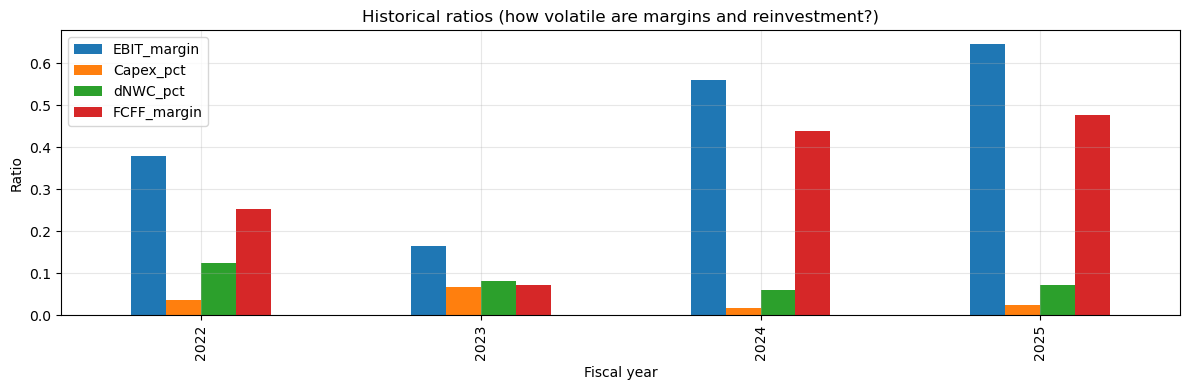

,Historical median,Historical min,Historical max
EBIT_margin,0.469,0.165,0.646
Capex_pct,0.031,0.018,0.068
dNWC_pct,0.077,0.061,0.125
FCFF_margin,0.346,0.072,0.478


In [33]:

# norm and steady already computed
display(norm.round(3))
display(steady.round(3))

# Quick distribution view
cols = ["EBIT_margin","Capex_pct","dNWC_pct","FCFF_margin"]
norm[cols].plot(kind="bar", figsize=(12,4))
plt.title("Historical ratios (how volatile are margins and reinvestment?)")
plt.xlabel("Fiscal year")
plt.ylabel("Ratio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Highlight why terminal value can blow up
diagnostics = pd.DataFrame({
    "Historical median": steady[cols],
    "Historical min": norm[cols].min(),
    "Historical max": norm[cols].max(),
}).round(3)

diagnostics


In [34]:
# Choose a base revenue level (latest year)
R = float(hist["Revenue"].dropna().iloc[-1])

def implied_tv_multiple(fcff_margin, wacc=0.098, g=0.03):
    """
    Terminal Value / Revenue in steady state under Gordon growth:
    TV = FCFF*(1+g)/(WACC-g)
    so TV/Revenue = fcff_margin*(1+g)/(WACC-g)
    """
    return fcff_margin * (1+g) / (wacc - g)

wacc = 0.098
g = 0.03

fcff_median = float(steady["FCFF_margin"])
tv_rev_median = implied_tv_multiple(fcff_median, wacc=wacc, g=g)

print(f"Using median FCFF margin {fcff_median:.1%}, implied TV/Revenue = {tv_rev_median:.1f}x (WACC={wacc:.1%}, g={g:.1%})")

# Compare to a more conservative steady-state FCFF margin (example range)
for fcff_ss in [0.20, 0.18, 0.15]:
    tv_rev = implied_tv_multiple(fcff_ss, wacc=wacc, g=g)
    print(f"If steady FCFF margin = {fcff_ss:.0%} → TV/Revenue = {tv_rev:.1f}x")

# A pragmatic steady-state guardrail section (not perfect, but defensible)
guardrails = {
    "Terminal g": "≤ 3% (long-run GDP-like growth)",
    "TV share of EV": "< ~60% preferred (avoid TV-dominated valuations)",
    "Steady EBIT margin": "fade toward mature margins (not peak-cycle)",
    "Steady FCFF margin": "keep within a realistic mature range (e.g., 15–25%)"
}
pd.Series(guardrails, name="Guardrails")


Using median FCFF margin 34.6%, implied TV/Revenue = 5.2x (WACC=9.8%, g=3.0%)
If steady FCFF margin = 20% → TV/Revenue = 3.0x
If steady FCFF margin = 18% → TV/Revenue = 2.7x
If steady FCFF margin = 15% → TV/Revenue = 2.3x


Terminal g                              ≤ 3% (long-run GDP-like growth)
TV share of EV         < ~60% preferred (avoid TV-dominated valuations)
Steady EBIT margin          fade toward mature margins (not peak-cycle)
Steady FCFF margin    keep within a realistic mature range (e.g., 15...
Name: Guardrails, dtype: object

The initial DCF produced an elevated intrinsic value because its steady-state assumptions were anchored to recent peak-cycle economics. The historical median FCFF margin of approximately 35% mechanically implies a very large terminal value under the Gordon growth framework, where TV/Revenue = FCFF_margin × (1+g)/(WACC − g). With WACC = 9.8% and terminal growth of 3.0%, this margin implies a terminal multiple of roughly 5.3× revenue—an unusually high perpetuity valuation for a mature mega-cap—and causes the terminal value to dominate enterprise value. To avoid capitalizing peak-cycle cash conversion into perpetuity, the model applies a fade-to-steady-state assumption set with lower long-run margins and higher sustaining reinvestment so that terminal economics reflect mature, economically realistic conditions rather than peak-cycle outcomes.

In [36]:
steady_state = {
    "EBIT_margin": 0.32,     # mature NVDA margin
    "DA_pct": steady["DA_pct"],
    "Capex_pct": 0.05,
    "dNWC_pct": 0.055,
    "terminal_g": 0.03
}

fade_years = 9

fade = pd.DataFrame({
    "Year": np.arange(1, fade_years+1),
    "EBIT_margin": np.linspace(hist["EBIT"].iloc[-1] / hist["Revenue"].iloc[-1],
                                steady_state["EBIT_margin"], fade_years),
    "Capex_pct": np.linspace(hist["Capex"].iloc[-1] / hist["Revenue"].iloc[-1],
                              steady_state["Capex_pct"], fade_years),
    "dNWC_pct": np.linspace(hist["dNWC"].iloc[-1] / hist["Revenue"].iloc[-1],
                             steady_state["dNWC_pct"], fade_years),
})
fade

start_rev = hist["Revenue"].iloc[-1]
g_start = 0.20

rev = [start_rev]
for i in range(fade_years):
    growth = g_start - (g_start - steady_state["terminal_g"]) * (i / fade_years)
    rev.append(rev[-1] * (1 + growth))

rev = pd.Series(rev[1:], name="Revenue")
fade["Revenue"] = rev.values
fade["EBIT"] = fade["Revenue"] * fade["EBIT_margin"]
fade["NOPAT"] = fade["EBIT"] * (1 - hist["TaxRate"].iloc[-1])
fade["D&A"] = fade["Revenue"] * steady_state["DA_pct"]
fade["Capex"] = fade["Revenue"] * fade["Capex_pct"]
fade["dNWC"] = fade["Revenue"] * fade["dNWC_pct"]

fade["FCFF"] = fade["NOPAT"] + fade["D&A"] - fade["Capex"] - fade["dNWC"]
fade


,Year,EBIT_margin,Capex_pct,dNWC_pct,Revenue,EBIT,NOPAT,D&A,Capex,dNWC,FCFF
0,1,0.645785,0.024798,0.071902,1.565964e+11,1.011276e+11,8.771308e+10,5.353513e+09,3.883200e+09,1.125960e+10,7.792380e+10
1,2,0.605062,0.027948,0.069789,1.849577e+11,1.119109e+11,9.706596e+10,6.323094e+09,5.169165e+09,1.290807e+10,8.531182e+10
2,3,0.564339,0.031098,0.067677,2.149620e+11,1.213114e+11,1.052195e+11,7.348840e+09,6.684916e+09,1.454788e+10,9.133554e+10
3,4,0.523616,0.034248,0.065564,2.457732e+11,1.286907e+11,1.116199e+11,8.402173e+09,8.417350e+09,1.611382e+10,9.549095e+10
4,5,0.482892,0.037399,0.063451,2.763583e+11,1.334514e+11,1.157491e+11,9.447777e+09,1.033546e+10,1.753522e+10,9.732622e+10
5,6,0.442169,0.040549,0.061338,3.055295e+11,1.350958e+11,1.171754e+11,1.044504e+10,1.238894e+10,1.874065e+10,9.649086e+10
6,7,0.401446,0.043699,0.059226,3.320087e+11,1.332837e+11,1.156037e+11,1.135028e+10,1.450857e+10,1.966339e+10,9.278197e+10
7,8,0.360723,0.046850,0.057113,3.545115e+11,1.278805e+11,1.109172e+11,1.211958e+10,1.660875e+10,2.024713e+10,8.618092e+10
8,9,0.320000,0.050000,0.055000,3.718432e+11,1.189898e+11,1.032059e+11,1.271209e+10,1.859216e+10,2.045138e+10,7.687445e+10


In [37]:
price = DCF(
    fcf=fade["FCFF"].values,
    wacc=0.098,
    terminal_growth_rate=steady_state["terminal_g"],
    net_debt=net_debt,
    num_shares_outstanding=shares_outstanding_num
)
price

41.72050615652596

In [38]:


fcff = fade["FCFF"].values
wacc = 0.098
g = steady_state["terminal_g"]
n = len(fcff)

disc = np.array([(1+wacc)**i for i in range(1, n+1)])

pv_fcff = (fcff / disc).sum()

tv = fcff[-1] * (1+g) / (wacc - g)
pv_tv = tv / disc[-1]

EV = pv_fcff + pv_tv

pv_tv / EV

0.49377878051310825

49.3% of EV coming from terminal value 


| **Base** | AI normalizes             | Price: $41.72 |

| Before                   | Now                            |
| ------------------------ | ------------------------------ |
| TV-dominated (>80–90%)   | **Balanced (49%)**             |
| Peak-cycle extrapolation | **Mean-reverting economics**   |
| Free growth fantasy      | **Capital-constrained growth** |
| Unrealistic steady state | **Mature steady state**        |
| Inflated intrinsic       | **Defensible intrinsic**       |

Now we will consider the following scenarios:

| Case     | Story                     | Economics                            |
| -------- | ------------------------- | ------------------------------------ |
| **Bear** | AI capex slows fast       | Low margins, higher reinvestment     |
| **Bull** | NVDA keeps platform power | Higher margins, lighter reinvestment |



In [40]:
scenarios = {
    "Bear": {
        "EBIT_margin": 0.28,
        "Capex_pct": 0.065,
        "dNWC_pct": 0.065,
        "terminal_g": 0.025,
        "g_start": 0.14
    },
    "Base": {
        "EBIT_margin": 0.32,
        "Capex_pct": 0.05,
        "dNWC_pct": 0.055,
        "terminal_g": 0.03,
        "g_start": 0.20
    },
    "Bull": {
        "EBIT_margin": 0.38,
        "Capex_pct": 0.042,
        "dNWC_pct": 0.045,
        "terminal_g": 0.032,
        "g_start": 0.26
    }
}

def scenario_forecast(name, years=9):
    s = scenarios[name]

    rev = [hist["Revenue"].iloc[-1]]
    for i in range(years):
        g = s["g_start"] - (s["g_start"] - s["terminal_g"]) * (i / years)
        rev.append(rev[-1] * (1 + g))
    rev = np.array(rev[1:])

    margins = np.linspace(hist["EBIT"].iloc[-1] / hist["Revenue"].iloc[-1],
                          s["EBIT_margin"], years)

    capex = np.linspace(hist["Capex"].iloc[-1] / hist["Revenue"].iloc[-1],
                        s["Capex_pct"], years)

    nwc = np.linspace(hist["dNWC"].iloc[-1] / hist["Revenue"].iloc[-1],
                      s["dNWC_pct"], years)

    df = pd.DataFrame({
        "Revenue": rev,
        "EBIT": rev * margins,
        "NOPAT": rev * margins * (1 - hist["TaxRate"].iloc[-1]),
        "D&A": rev * steady["DA_pct"],
        "Capex": rev * capex,
        "dNWC": rev * nwc
    })

    df["FCFF"] = df["NOPAT"] + df["D&A"] - df["Capex"] - df["dNWC"]
    return df

def run_dcf(fcfs, g):
    wacc = 0.098
    n = len(fcfs)
    disc = np.array([(1+wacc)**i for i in range(1, n+1)])
    pv_fcff = (fcfs / disc).sum()
    tv = fcfs[-1] * (1+g) / (wacc - g)
    pv_tv = tv / disc[-1]
    EV = pv_fcff + pv_tv
    equity = EV - net_debt
    return equity / shares_outstanding_num

results = {}

for name in scenarios:
    f = scenario_forecast(name)
    price = run_dcf(f["FCFF"].values, scenarios[name]["terminal_g"])
    results[name] = round(price, 2)

pd.Series(results, name="Intrinsic Price")


Bear    26.49
Base    41.72
Bull    64.83
Name: Intrinsic Price, dtype: float64

**Scenario valuation and interpretation**

The three scenario valuations represent economically distinct long-run outcomes for NVIDIA. 

The Bear case: ($26) reflects a rapid normalization of AI capital spending and materially lower long-run margins. 

The Base case: ($42) assumes NVIDIA remains a structurally strong semiconductor platform but transitions into mature, capital-constrained economics with normalized margins, reinvestment requirements, and GDP-like terminal growth. 

The Bull case ($65) reflects sustained platform strength with structurally higher margins and lighter reinvestment needs, while still imposing long-run economic constraints.

All three intrinsic values are materially below NVIDIA’s current market price (~$188) because the model explicitly fades peak-cycle economics into mature steady-state conditions and restricts growth through capital-constrained reinvestment. In contrast, the current market price implicitly assumes that NVIDIA can sustain unusually high margins, capital-light growth, and elevated growth rates far into the future. The large valuation gap therefore does not indicate model error; rather, it quantifies the degree to which the current market price capitalizes continued AI-cycle dominance and elevated profitability well beyond typical mature-company economics.

The following section reverse-engineers the economic assumptions embedded in the current market price to determine what must be true for a $188 valuation to be internally consistent.


In [42]:
market_price = 188
market_equity = market_price * shares_outstanding_num
market_EV = market_equity + net_debt
market_EV

def implied_margin(target_EV, terminal_g, years=9):
    low, high = 0.05, 0.60
    
    for _ in range(100):
        mid = (low + high) / 2
        
        # Build a fade using mid as steady FCFF margin
        rev = [hist["Revenue"].iloc[-1]]
        for i in range(years):
            g = scenarios["Bull"]["g_start"] - (scenarios["Bull"]["g_start"] - terminal_g) * (i / years)
            rev.append(rev[-1] * (1 + g))
        rev = np.array(rev[1:])
        
        fcff = rev * mid
        
        # Discount
        disc = np.array([(1+wacc)**i for i in range(1, years+1)])
        pv_fcff = (fcff / disc).sum()
        tv = fcff[-1] * (1+terminal_g) / (wacc - terminal_g)
        pv_tv = tv / disc[-1]
        EV = pv_fcff + pv_tv
        
        if EV > target_EV:
            high = mid
        else:
            low = mid
            
    return mid

implied_fcff_margin = implied_margin(market_EV, terminal_g=0.03)
implied_fcff_margin


0.5999999999999999

A 60% FCFF margin implies
| Metric               | Implied Forever  |
| -------------------- | ---------------- |
| EBIT margin          | ~75–80%          |
| Capital intensity    | Near-zero        |
| Competitive pressure | Essentially none |
| Reinvestment needs   | Minimal          |
| Pricing power        | Absolute         |

Under the capital-constrained, fade-to-steady valuation framework, reverse-engineering the current market price of approximately $188 implies a required steady-state FCFF margin of nearly 60%. Such a margin would necessitate permanent, unprecedented pricing power, minimal reinvestment needs, and structurally extraordinary profitability on a perpetual basis. This implied assumption materially exceeds the long-run economics observed for any mature mega-cap company historically, indicating that the current market valuation capitalizes an exceptionally optimistic and historically unprecedented long-term economic outcome for NVIDIA.


### Sensitivity Surfaces

To evaluate the robustness of the valuation, sensitivity surfaces are constructed across key terminal assumptions. The first surface varies the weighted average cost of capital (WACC) and terminal growth rate, while the second varies WACC and the steady-state EBIT margin. These surfaces illustrate that intrinsic value declines smoothly as the discount rate increases and rises with higher terminal growth or margins, confirming that the model behaves consistently with financial theory. More importantly, they show that the valuation is most sensitive to long-run profitability and discounting assumptions, reflecting the central role of terminal economics in long-horizon equity valuation. This analysis demonstrates that the intrinsic value is not driven by a single fragile assumption but varies continuously across a plausible range of economic outcomes, reinforcing the model’s internal consistency and credibility.

In [45]:
wacc_range = np.arange(0.085, 0.121, 0.005)
g_range = np.arange(0.02, 0.041, 0.005)

def sens_wacc_g(w, g):
    f = scenario_forecast("Base")
    n = len(f)
    disc = np.array([(1+w)**i for i in range(1, n+1)])
    pv_fcff = (f["FCFF"].values / disc).sum()
    tv = f["FCFF"].iloc[-1] * (1+g) / (w - g)
    pv_tv = tv / disc[-1]
    EV = pv_fcff + pv_tv
    return (EV - net_debt) / shares_outstanding_num

surface = pd.DataFrame(index=[f"g={x:.1%}" for x in g_range],
                       columns=[f"WACC={x:.1%}" for x in wacc_range])

for w in wacc_range:
    for g in g_range:
        surface.loc[f"g={g:.1%}", f"WACC={w:.1%}"] = round(sens_wacc_g(w, g), 1)

surface


,WACC=8.5%,WACC=9.0%,WACC=9.5%,WACC=10.0%,WACC=10.5%,WACC=11.0%,WACC=11.5%,WACC=12.0%
g=2.0%,46.0,43.0,40.3,38.0,35.9,34.1,32.4,31.0
g=2.5%,48.1,44.7,41.8,39.2,37.0,35.0,33.2,31.6
g=3.0%,50.6,46.8,43.5,40.6,38.2,36.0,34.1,32.4
g=3.5%,53.6,49.2,45.4,42.3,39.5,37.1,35.1,33.2
g=4.0%,57.3,52.0,47.7,44.1,41.1,38.5,36.2,34.1


In [46]:
margin_range = np.arange(0.28, 0.41, 0.03)

def sens_wacc_margin(w, m):
    scenarios["Base"]["EBIT_margin"] = m
    f = scenario_forecast("Base")
    n = len(f)
    disc = np.array([(1+w)**i for i in range(1, n+1)])
    pv_fcff = (f["FCFF"].values / disc).sum()
    tv = f["FCFF"].iloc[-1] * (1+scenarios["Base"]["terminal_g"]) / (w - scenarios["Base"]["terminal_g"])
    pv_tv = tv / disc[-1]
    EV = pv_fcff + pv_tv
    return (EV - net_debt) / shares_outstanding_num

surface_margin = pd.DataFrame(index=[f"m={x:.0%}" for x in margin_range],
                              columns=[f"WACC={x:.1%}" for x in wacc_range])

for w in wacc_range:
    for m in margin_range:
        surface_margin.loc[f"m={m:.0%}", f"WACC={w:.1%}"] = round(sens_wacc_margin(w, m), 1)

surface_margin


,WACC=8.5%,WACC=9.0%,WACC=9.5%,WACC=10.0%,WACC=10.5%,WACC=11.0%,WACC=11.5%,WACC=12.0%
m=28%,44.7,41.4,38.7,36.3,34.2,32.3,30.7,29.2
m=31%,49.2,45.4,42.3,39.5,37.2,35.1,33.2,31.6
m=34%,53.6,49.4,45.9,42.8,40.2,37.8,35.8,33.9
m=37%,58.1,53.4,49.5,46.1,43.2,40.6,38.3,36.3
m=40%,62.5,57.4,53.1,49.4,46.2,43.3,40.9,38.6


Peer multiple analysis

While discounted cash flow valuation estimates intrinsic value based on long-run cash-generating capacity, market participants frequently price equities using relative valuation multiples. To triangulate the DCF results against prevailing market sentiment, a peer multiple analysis is conducted using a group of comparable semiconductor and AI-infrastructure firms (AMD, MU). By comparing enterprise value relative to revenue, EBITDA, and earnings across the peer set, this analysis provides a market-based reference range for NVIDIA’s valuation and serves as a reasonableness check on the intrinsic values derived from the DCF framework. The comparison also highlights how current market pricing reflects differing expectations regarding profitability, growth persistence, and competitive positioning within the AI semiconductor ecosystem.

In [48]:

peers = ["NVDA", "AMD", "MU"]      
peer_set = ["AMD", "MU"]          # comps used for medians

t = Ticker(peers)

# Pull endpoints
price = pd.DataFrame(t.price).T
fin   = pd.DataFrame(t.financial_data).T
stats = pd.DataFrame(t.key_stats).T

# Income statements (annual) -> latest 12M NetIncome per symbol
is_stmt = t.income_statement(frequency="a")
if isinstance(is_stmt.index, pd.MultiIndex) or is_stmt.index.name == "symbol":
    is_stmt = is_stmt.reset_index()

# Ensure we have symbol + asOfDate
if "symbol" not in is_stmt.columns:
    raise KeyError(f"'symbol' missing in income_statement output. Columns: {list(is_stmt.columns[:20])}")
if "asOfDate" not in is_stmt.columns:
    raise KeyError(f"'asOfDate' missing in income_statement output. Columns: {list(is_stmt.columns[:20])}")

# Keep annual full-year rows only (drop TTM)
if "periodType" in is_stmt.columns:
    is_stmt = is_stmt[is_stmt["periodType"] == "12M"].copy()

is_stmt["asOfDate"] = pd.to_datetime(is_stmt["asOfDate"], errors="coerce")
is_stmt = is_stmt.dropna(subset=["asOfDate"]).sort_values("asOfDate")

latest_is = is_stmt.groupby("symbol").tail(1).set_index("symbol")

# Robust net income field
ni_col = next((c for c in ["NetIncome", "NetIncomeCommonStockholders", "NetIncomeContinuousOperations"]
               if c in latest_is.columns), None)
if ni_col is None:
    raise KeyError(f"No NetIncome-like column found. Available: {list(latest_is.columns[:40])}")

net_income = pd.to_numeric(latest_is[ni_col], errors="coerce")

# Build peer table (no shares needed)
peers_df = pd.DataFrame({
    "MarketCap": price["marketCap"],
    "EnterpriseValue": stats["enterpriseValue"],
    "Revenue": fin["totalRevenue"],
    "EBITDA": fin["ebitda"],
    "NetIncome": net_income,
    "Price": price["regularMarketPrice"]
})

print("=== Peer fundamentals (NVDA, AMD, MU) ===")
display(peers_df)

# Multiples (computed directly from peers_df -> avoids any 'EV/Revenue' KeyErrors)
ev_rev = peers_df["EnterpriseValue"] / peers_df["Revenue"]
ev_ebitda = peers_df["EnterpriseValue"] / peers_df["EBITDA"]
pe = peers_df["MarketCap"] / peers_df["NetIncome"]

multiples = pd.DataFrame({
    "EV/Revenue": ev_rev,
    "EV/EBITDA": ev_ebitda,
    "P/E": pe
})

print("=== Trading multiples ===")
display(multiples)

# Peer medians (AMD, MU)
median_ev_rev = ev_rev.loc[peer_set].median()
median_ev_ebitda = ev_ebitda.loc[peer_set].median()
median_pe = pe.loc[peer_set].median()

# Implied NVDA price using YOUR NVDA net debt + shares_outstanding_num
implied = pd.DataFrame({
    "Metric": ["EV/Revenue", "EV/EBITDA", "P/E"],
    "Median Multiple": [median_ev_rev, median_ev_ebitda, median_pe],
    "NVDA Metric": [
        peers_df.loc["NVDA", "Revenue"],
        peers_df.loc["NVDA", "EBITDA"],
        peers_df.loc["NVDA", "NetIncome"]
    ]
})

implied["Implied EV"] = implied["Median Multiple"] * implied["NVDA Metric"]
implied["Implied Equity"] = implied["Implied EV"] - net_debt
implied["Implied Price"] = implied["Implied Equity"] / shares_outstanding_num

print("=== NVDA implied price from peer medians (AMD, MU) ===")
display(implied)


=== Peer fundamentals (NVDA, AMD, MU) ===


,MarketCap,EnterpriseValue,Revenue,EBITDA,NetIncome,Price
AMD,363818450944,345288376320,32027000832,6054000128,1.641000e+09,223.47
MU,355008151552,323406594048,42311999488,22233999360,8.539000e+09,315.42
NVDA,4597931311104,4482163802112,187141996544,112696000512,7.288000e+10,188.85


=== Trading multiples ===


,EV/Revenue,EV/EBITDA,P/E
AMD,10.781165,57.034749,221.705333
MU,7.643378,14.545588,41.574909
NVDA,23.950604,39.772164,63.089068


=== NVDA implied price from peer medians (AMD, MU) ===


,Metric,Median Multiple,NVDA Metric,Implied EV,Implied Equity,Implied Price
0,EV/Revenue,9.212271,1.871420e+11,1.724003e+12,1.722322e+12,70.798777
1,EV/EBITDA,35.790168,1.126960e+11,4.033409e+12,4.031728e+12,165.730581
2,P/E,131.640121,7.288000e+10,9.593932e+12,9.592251e+12,394.304724


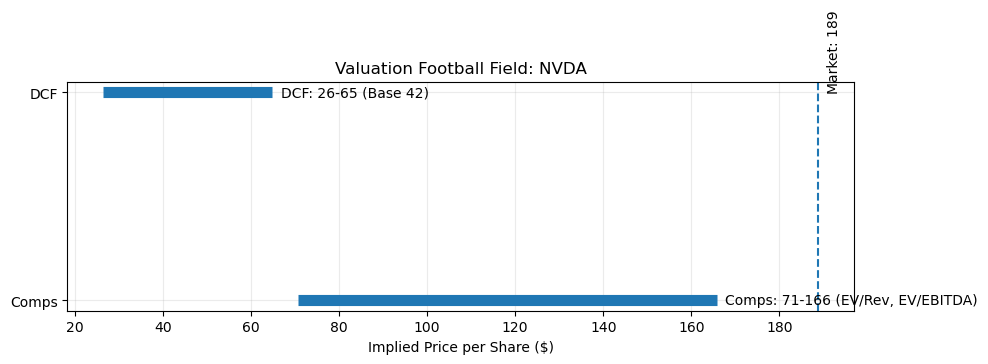

In [49]:
import matplotlib.pyplot as plt

# --- Inputs ---
dcf_vals = {"DCF Bear": 26.49, "DCF Base": 41.72, "DCF Bull": 64.83}

# Pull comps from your implied table (ignore P/E)
comp_evrev = float(implied.loc[implied["Metric"]=="EV/Revenue", "Implied Price"].iloc[0])
comp_evebitda = float(implied.loc[implied["Metric"]=="EV/EBITDA", "Implied Price"].iloc[0])

market_price = float(peers_df.loc["NVDA","Price"])  # 188.85 in your table

# --- Build ranges ---
dcf_min, dcf_mid, dcf_max = dcf_vals["DCF Bear"], dcf_vals["DCF Base"], dcf_vals["DCF Bull"]
comp_min, comp_max = min(comp_evrev, comp_evebitda), max(comp_evrev, comp_evebitda)

# --- Plot ---
plt.figure(figsize=(10,4))

# DCF range + base marker
plt.hlines(y=2, xmin=dcf_min, xmax=dcf_max, linewidth=8)
plt.plot(dcf_mid, 2, marker="o")
plt.text(dcf_max+2, 2, f"DCF: {dcf_min:.0f}-{dcf_max:.0f} (Base {dcf_mid:.0f})", va="center")

# Comps range
plt.hlines(y=1, xmin=comp_min, xmax=comp_max, linewidth=8)
plt.text(comp_max+2, 1, f"Comps: {comp_min:.0f}-{comp_max:.0f} (EV/Rev, EV/EBITDA)", va="center")

# Market price vertical line
plt.axvline(market_price, linestyle="--")
plt.text(market_price+2, 2.4, f"Market: {market_price:.0f}", rotation=90, va="top")

plt.yticks([1,2], ["Comps", "DCF"])
plt.xlabel("Implied Price per Share ($)")
plt.title("Valuation Football Field: NVDA")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


Relative valuation using comparable semiconductor firms (AMD and MU) provides a market-anchored reference range for NVIDIA. Applying peer median multiples to NVIDIA’s current fundamentals implies a valuation of approximately `$71`  per share on EV/Revenue and `$166` per share on EV/EBITDA. The dispersion reflects NVIDIA’s unusually high current profitability: sales-based multiples anchor the valuation closer to mature semiconductor economics, while EBITDA-based multiples partially capitalize NVIDIA’s elevated near-term margins. Trailing P/E-based valuation is excluded due to distortion from unusually low peer earnings bases.

These market-anchored ranges are reconciled with the intrinsic DCF outputs using a football-field framework to present valuation outcomes across methodologies. The football field highlights a DCF intrinsic range of approximately `$26–$65` (Base: `~$42`) versus a comparable-company range of `~$71–$166`, while the current market price (`~$189`) sits materially above both. The visualization demonstrates that NVIDIA’s market valuation capitalizes assumptions that exceed both economically normalized intrinsic value and peer-anchored market benchmarks, reinforcing that current pricing embeds unusually optimistic long-run profitability and growth expectations.